In [1]:
#Importing the dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Data Collection and Preprocessing

In [2]:
#Loading the Dataset into a pandas dataframe
loan_df = pd.read_csv('train.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#View the shape of the dataframe
loan_df.shape

(614, 13)

In [4]:
#Statistical summary of the dataframe
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
#Checking for missing Values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Dropping the missing values
loan_df = loan_df.dropna()
loan_df.shape

(480, 13)

In [7]:
#Label Encoding 
#loan_df.replace({'Loan_Status':{'N':0,'Y':1}}, inplace = True)
#loan_df.head()

In [8]:
# label encoding
label_encoder = LabelEncoder()

# Encode the labels in the 'Loan_Status' column.
loan_df['Loan_Status']= label_encoder.fit_transform(loan_df['Loan_Status'])

#Viewing the values in the column
loan_df.Loan_Status.unique()

array([0, 1])

In [9]:
#Viewing the values in the dependent column
loan_df.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [10]:
#Replace 3+ with 4

loan_df = loan_df.replace(to_replace="3+", value=4)

In [11]:
#Checking to see if the values were properly replaced
loan_df.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

/tmp/ipykernel_16539/1894642092.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_corr = loan_df.corr()


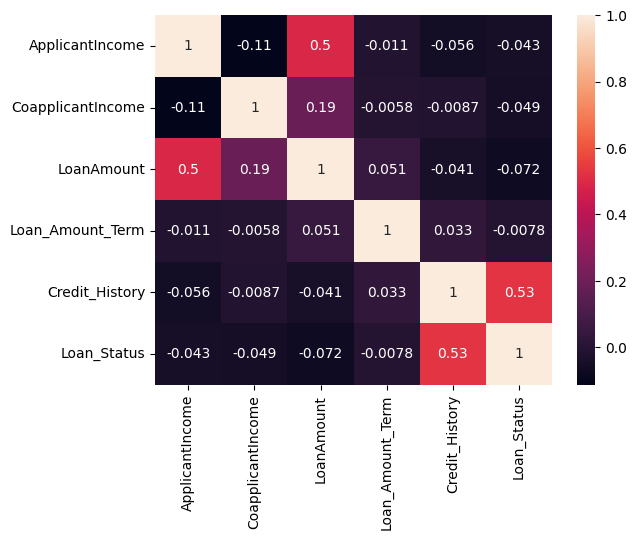

In [12]:
#View the corr between the various variables in the dataframe 
loan_corr = loan_df.corr()
ax = sns.heatmap(loan_corr, annot = True)
plt.show()

### This doen't provide us with enough information to understand the data, we will be viewing the relationship between our variable of interest individually using seaborn's countplot

In [13]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot: xlabel='Education', ylabel='count'>

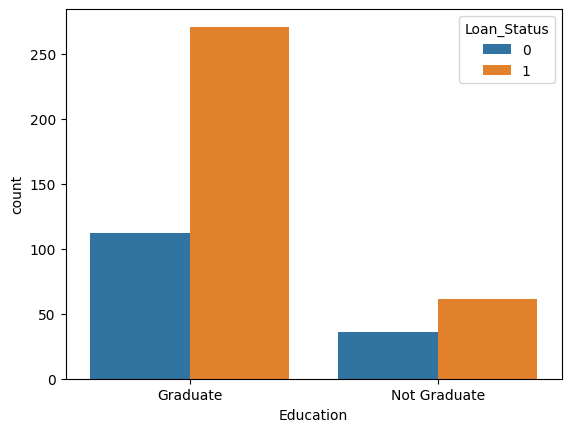

In [14]:
#Relationship between education and loan Status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_df)

## 0 -- Rejected
## 1 -- Aproved

### From our data it can be observed that educated people are more likely to get approved for loan than Non-Graduate individuals

<AxesSubplot: xlabel='Married', ylabel='count'>

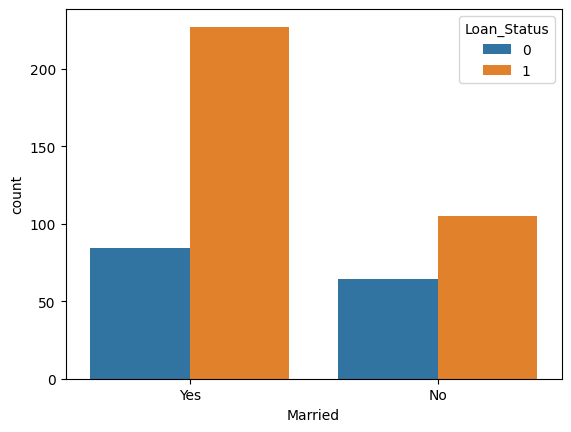

In [15]:
#Relationship between  marital status and Loan Status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_df)

### Similarly it can be observed that there is a higher approval rate for married people than non-married individuals

<AxesSubplot: xlabel='Dependents', ylabel='count'>

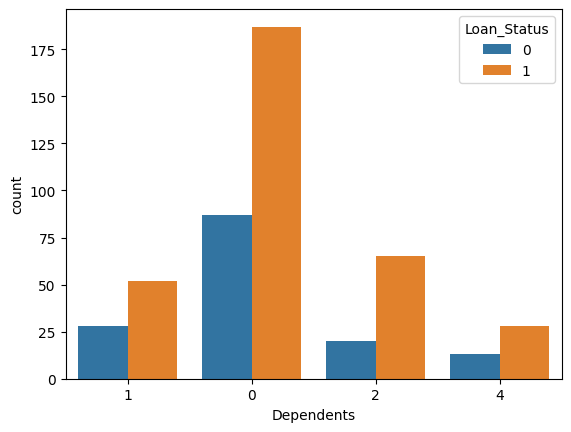

In [16]:
#Relationship between the no of dependents for an applicant vs their Loan Status
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = loan_df)

### The Lesser the number of dependents an applicant has the higher their chances of being approved for a loan

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

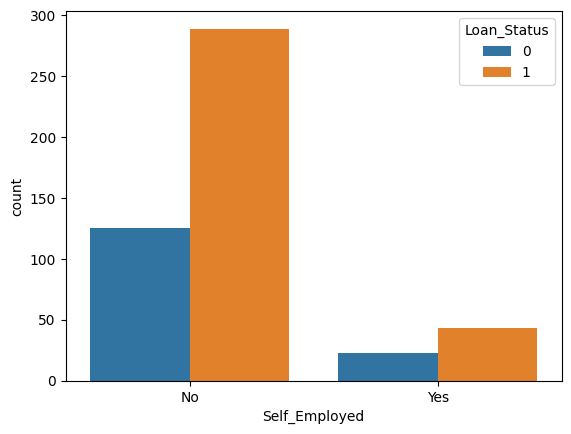

In [17]:
#Do Self employed applicants have a higher chance for loan approval than others
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = loan_df)

### It can be observed from the data that people that are self employed have a lower chance of being approved for loan than their employed counterparts

<AxesSubplot: xlabel='Gender', ylabel='count'>

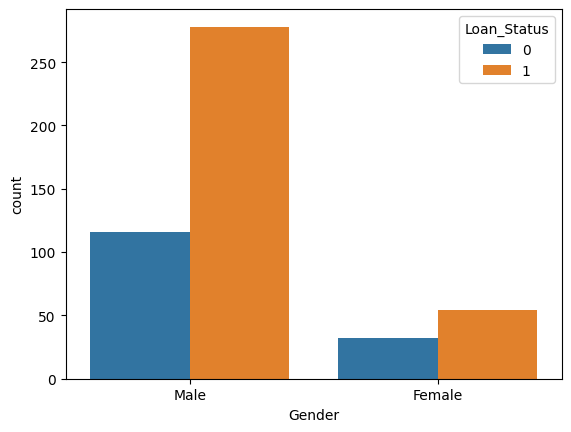

In [18]:
#Relationship between Gender and Loan_status
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_df)

### From the data it can be observed that Male applicants have a higher chance of loan approval than Female applicants

In [19]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
#Viewing the unique values in the Property Area column
loan_df.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [21]:
#Viewing the unique values in the Education column
loan_df.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [22]:
#Label encoding for the categorical data in the dataframe
loan_df['Gender'] = label_encoder.fit_transform(loan_df['Gender'])
loan_df['Married'] = label_encoder.fit_transform(loan_df['Married'])
loan_df['Self_Employed'] = label_encoder.fit_transform(loan_df['Self_Employed'])
loan_df['Property_Area'] = label_encoder.fit_transform(loan_df['Property_Area'])
loan_df['Education'] = label_encoder.fit_transform(loan_df['Education'])

In [23]:
#Viewing the results of the encoding
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [24]:
#Printing the unique Values in the encoded columns
print(f"{loan_df.Gender.unique()},\n{loan_df.Married.unique()},\n{loan_df.Education.unique()},\
      \n{loan_df.Self_Employed.unique()},\n{loan_df.Property_Area.unique()},\n{loan_df.Loan_Status.unique()}")

[1 0],
[1 0],
[0 1],      
[0 1],
[0 2 1],
[0 1]


In [25]:
loan_df.to_csv('loan_df_encoded.csv', index = False)